### Import Library

In [41]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Callback

In [42]:
class AccuracyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['val_accuracy'] >= 0.74:
            self.model.stop_training = True

### Atur dataset

In [43]:
dataset_path = '../../data/raw'

# Augmentasi
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    # brightness_range=[0.5, 1.5],
    validation_split=0.2
)

# Untuk training dan validasi
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1139 images belonging to 6 classes.
Found 282 images belonging to 6 classes.


### Bangun model

In [44]:
# Buat model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(6, activation='softmax'))

### Compile model

In [45]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Train model

In [46]:
accuracy_callback = AccuracyCallback()

history = model.fit(
    train_generator,
    epochs=1000,
    validation_data=validation_generator,
    callbacks=[accuracy_callback]
)

Epoch 1/1000
36/36 [==============================] - 20s 511ms/step - loss: 1.6131 - accuracy: 0.3275 - val_loss: 1.6010 - val_accuracy: 0.4291
Epoch 2/1000
36/36 [==============================] - 16s 436ms/step - loss: 1.2618 - accuracy: 0.5338 - val_loss: 1.4801 - val_accuracy: 0.5035
Epoch 3/1000
36/36 [==============================] - 16s 436ms/step - loss: 1.0656 - accuracy: 0.6313 - val_loss: 1.3688 - val_accuracy: 0.5319
Epoch 4/1000
36/36 [==============================] - 16s 432ms/step - loss: 0.9581 - accuracy: 0.6567 - val_loss: 1.3466 - val_accuracy: 0.5638
Epoch 5/1000
36/36 [==============================] - 16s 432ms/step - loss: 0.8825 - accuracy: 0.6953 - val_loss: 1.2512 - val_accuracy: 0.5851
Epoch 6/1000
36/36 [==============================] - 15s 431ms/step - loss: 0.7837 - accuracy: 0.7375 - val_loss: 1.2605 - val_accuracy: 0.6418
Epoch 7/1000
36/36 [==============================] - 17s 460ms/step - loss: 0.7134 - accuracy: 0.7568 - val_loss: 1.3281 - val_ac

### Visualisasi

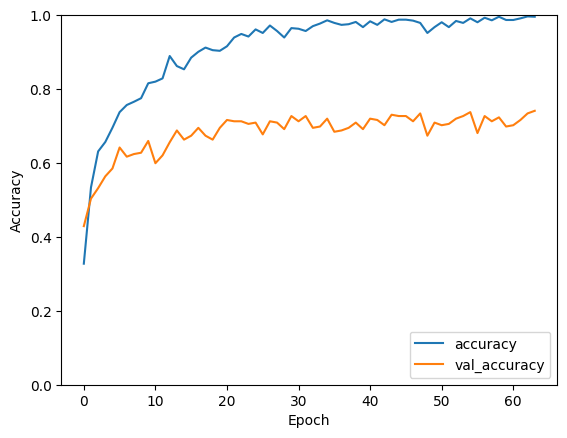

In [47]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

### Save ke TFlite

In [48]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\62813\AppData\Local\Temp\tmp5yqrue64\assets


INFO:tensorflow:Assets written to: C:\Users\62813\AppData\Local\Temp\tmp5yqrue64\assets
